# Examine RadarSAT2 Archive for a particular location

# (GOOD!) Now that MDA is part of Maxar, it seems new and better search finally exists!
https://gsiportal.mdacorporation.com/gc_cp/#/map 

###### (BAD) full catalog search as of 10/2018:
https://www.eodms-sgdot.nrcan-rncan.gc.ca/index_en.jsp 


###### (BAD) old catalog search allows downloading csvs:
https://neodf.nrcan.gc.ca/neodf_cat3/index.php?lang=en#



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [2]:
%matplotlib inline
#%qtconsole

In [3]:
pwd

'/Users/scott/Documents/GitHub/snowex/snowex2019'

# Conus Digital Globe tasking

In [5]:
df = pd.read_csv('./co-nm/Name_GM2ER1_092aa-RS2.csv')
df.head()

,Satellite,Acq Start Date,Beam,Polarization,Type,Image ID
0,RADARSAT-2,2018-07-05 01:06:43,Extra Fine W3,HH,raw,649222
1,RADARSAT-2,2018-06-28 01:10:50,Extra Fine W3,HH,raw,647637
2,RADARSAT-2,2018-03-31 01:06:23,Extra Fine W3,HH,raw,627133
3,RADARSAT-2,2018-01-04 01:15:12,Extra Fine W3,HH,raw,609248
4,RADARSAT-2,2018-03-28 13:08:18,Extra Fine W3,HH,raw,626658


In [6]:
print('Total acquisitions:', len(df))
print('Sensor Modes:', df.Beam.unique())
print('Polarizations:', df.Polarization.unique())
#print('Ascending and Descending?', df.Passdirect.unique())
#print('Scene Center Incidence', df.CenterScen.unique())
#df.head()

Total acquisitions: 79
Sensor Modes: ['Extra Fine W3' 'ScanSAR Wide A (W1 W2 W3 S7)' 'Wide Multi-Look Fine 23'
 'ScanSAR Narrow B (W2 S5 S6)' 'ScanSAR Narrow A (W1 W2)']
Polarizations: ['HH' 'HH HV' 'VV VH']


In [7]:
# Simple groupby beam mode counts
df.groupby('Beam')['Satellite'].count()

Beam
Extra Fine W3                   60
ScanSAR Narrow A (W1 W2)         2
ScanSAR Narrow B (W2 S5 S6)      7
ScanSAR Wide A (W1 W2 W3 S7)     9
Wide Multi-Look Fine 23          1
Name: Satellite, dtype: int64

In [8]:
# NOTE: could make timeline plot showing just how ridiculous this acquisition plan is!
#http://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category
#http://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
DF = pd.DataFrame(dict(beam=df['Beam'], date=df['Acq Start Date']))
DF['code'] = DF.beam.astype('category').cat.codes
DF['time'] = pd.to_datetime(DF.date)
#DF.time.dtype
#DF.time[0]
#DF.code.unique()
DF.sort_values('code', inplace=True)

In [9]:
DF.head()

,beam,date,code,time
0,Extra Fine W3,2018-07-05 01:06:43,0,2018-07-05 01:06:43
72,Extra Fine W3,2018-05-04 01:15:05,0,2018-05-04 01:15:05
35,Extra Fine W3,2017-05-09 01:15:30,0,2017-05-09 01:15:30
36,Extra Fine W3,2017-01-23 01:06:51,0,2017-01-23 01:06:51
37,Extra Fine W3,2017-07-10 01:06:44,0,2017-07-10 01:06:44


Text(0.5, 1.0, 'RS2 Observations (5 Modes)')

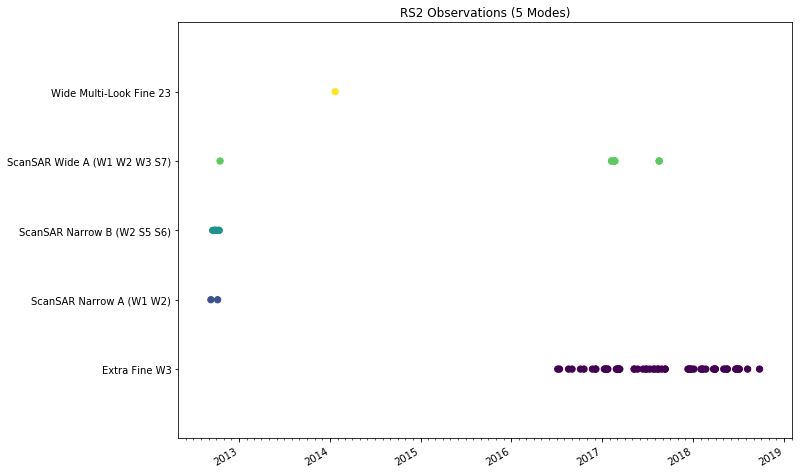

In [11]:
nmodes = len(DF.code.unique())
fig,ax = plt.subplots(figsize=(11,8.5))
plt.scatter(DF.time.values, DF.code.values, c=DF.code.values, s=40)
junk = plt.yticks(DF.code.unique(), DF.beam.unique())
plt.ylim(-1, nmodes)
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_locator(YearLocator())
#ax.fmt_xdata = DateFormatter('%Y-%m-%d') #for interactive plots
fig.autofmt_xdate()
plt.title('RS2 Observations ({} Modes)'.format(nmodes))
#plt.savefig('rs2modes_timeline.pdf', bbox_inches='tight')

## Note that without footprints, it's hard to tell what can be used for interferometry.
### Can't figure out how to get scenes from same pass! But manual clicking around suggests following dates for same frame:
Note that 3 frams cover Grand Mesa Swath...

# Image ID  Mode                Orientation      Incidence
 649222     "Extra Fine Wide"  Ascending     41    2018-07-05    430217

Eastern Mesa:
2018-07-05
2018-05-18
2018-03-31
2017-08-27

Western Mesa:
2018-09-25
2018-08-08
2018-06-21
2018-05-04
2018-02-21
2017-01-09
2017-12-11
2017-08-13
2017-06-26







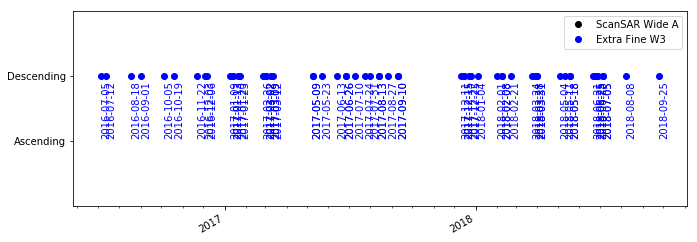

In [12]:
# Simple plot
beam1 = 'ScanSAR Wide A'
beam2 = 'Extra Fine W3'

# separate into Ascending and Descending
df['time'] = pd.to_datetime(df['Acq Start Date'])
dfA = df.query("Beam == @beam1")
dfD = df.query("Beam == @beam2")
fig,ax = plt.subplots(figsize=(11,4))

plt.plot(dfA.time, np.ones(len(dfA)), 'ko', label=beam1)
#annotate dates
for ts in dfA.time:
    plt.text(ts,0.8,ts.strftime('%Y-%m-%d'),rotation=90)

plt.plot(dfD.time, 2*np.ones(len(dfD)), 'bo', label=beam2)
#annotate dates
for ts in dfD.time:
    plt.text(ts,1.8,ts.strftime('%Y-%m-%d'),rotation=90,color='b')


plt.yticks([1,2], ['Ascending', 'Descending'])
plt.ylim(0,3)
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_locator(YearLocator())
#ax.fmt_xdata = DateFormatter('%Y-%m-%d') #for interactive plots
plt.legend()
fig.autofmt_xdate()
#plt.savefig('rs2_ruiz_timeline.pdf', bbox_inches='tight')